### 1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [137]:
import numpy as np
import matplotlib.pyplot as plt

In [138]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [139]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * W # градиент регуляризации
        
        W -= eta * (dQ + dReg)
    return W

def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

In [149]:
regs = np.arange(0, 100, 2)

array_W = [gradient_descent_reg_l2(X_st, y, iterations=1000, reg=reg) for reg in regs]

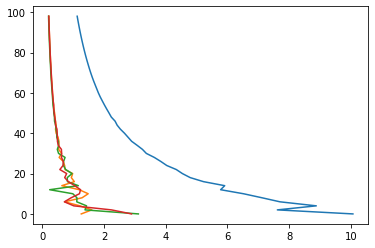

In [150]:
array_W = np.array(array_W)

for i in range(array_W.shape[1]):
    plt.plot(array_W[:, i], regs)

Видно, как при увеличении коэффициента регуляризации веса становятся менее значимые и стремятся к нулю.

### 2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации

In [152]:
# Производная модуля x
def der(x):
    return x / abs(x)

In [160]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        dReg = reg * der(W) # градиент регуляризации
        
        W -= eta * (dQ + dReg)
    return W

In [161]:
regs = np.arange(0, 100, 2)

array_W = [gradient_descent_reg_l1(X_st, y, iterations=1000, reg=reg) for reg in regs]

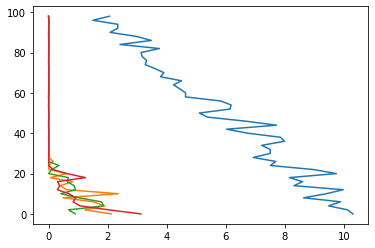

In [157]:
array_W = np.array(array_W)

for i in range(array_W.shape[1]):
    plt.plot(array_W[:, i], regs)

В отличие от L2, при L1 малые коэффицициенты достаточно быстро приравнялись к нулю.

### 3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Применить можно, но смысла не имеет.

Практическая проверка:

In [164]:
from sklearn.preprocessing import normalize, StandardScaler

In [166]:
m = np.random.randint(10, size=(3, 3))
m

array([[8, 1, 2],
       [8, 5, 4],
       [3, 2, 7]])

In [179]:
st_m = StandardScaler().fit_transform(m)
norm_m = normalize(m)

In [180]:
# Обратные операции
st_m_2 = StandardScaler().fit_transform(norm_m)
norm_m_2 = normalize(st_m)

In [181]:
def mean_std(x):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    display(means, stds)

In [187]:
mean_std(st_m) == mean_std(st_m_2)

array([  1. ,   3. , 975. ,   1.7])

array([  0.        ,   2.82842712, 484.89689626,   0.78102497])

array([  1. ,   3. , 975. ,   1.7])

array([  0.        ,   2.82842712, 484.89689626,   0.78102497])

True

In [188]:
mean_std(norm_m_2) == mean_std(norm_m)

array([  1. ,   3. , 975. ,   1.7])

array([  0.        ,   2.82842712, 484.89689626,   0.78102497])

array([  1. ,   3. , 975. ,   1.7])

array([  0.        ,   2.82842712, 484.89689626,   0.78102497])

True

Среднее и стандартное отклонение не изменяются, следовательно роль весов также не меняется.

### 4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [190]:
from sklearn.datasets import make_regression

In [191]:
regr = make_regression()

In [195]:
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [318]:
# Возьмем 2 признака и 1000 объектов
n_features = 2
n_objects = 1000

# шаг градиентного спуска
eta = 0.05

# максимальное число итераций
max_iter = 1e3

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-6

# возьмем нулевые начальные веса
w = np.zeros(n_features)

X, Y, coef = make_regression(n_samples=n_objects, n_features=n_features, n_informative=2, n_targets=1, 
                                      noise=5, coef=True, random_state=2)

# ход градиентного спуска
def gd(w, w_list, errors, weight_dist, iter_num, max_iter):
    while weight_dist > min_weight_dist and iter_num < max_iter:
        new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - Y)) / Y.shape[0]
        weight_dist = np.linalg.norm(new_w - w, ord=2)

        w_list.append(new_w.copy())
        errors.append(mserror(X, new_w, Y))

        iter_num += 1
        w = new_w

    iters_gd = iter_num
    errors_gd = errors
    w_list_gd = np.array(w_list)

    return (iters_gd, errors_gd, w_list_gd)


# ход стохастического градиентного спуска
def sgd(w, w_list, errors, weight_dist, iter_num, max_iter):
    while weight_dist > min_weight_dist and iter_num < max_iter:

        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(X.shape[0], size=1)

        y_pred = np.dot(X[train_ind], w)
        new_w = w - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        weight_dist = np.linalg.norm(new_w - w, ord=2)

        error = mserror(X, new_w, Y)

        w_list.append(new_w.copy())
        errors.append(error)

        iter_num += 1
        w = new_w

    iters_sgd = iter_num
    errors_sgd = errors
    w_list_sgd = np.array(w_list)
    
    return (iters_sgd, errors_sgd, w_list_sgd)

In [323]:
# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

iters_gd, errors_gd, w_list_gd = gd(w, w_list, errors, weight_dist, iter_num, max_iter)

In [324]:
w_list = [w.copy()]
errors = []
weight_dist = np.inf
iter_num = 0
w = np.zeros(n_features)

iters_sgd, errors_sgd, w_list_sgd = sgd(w, w_list, errors, weight_dist, iter_num, max_iter)

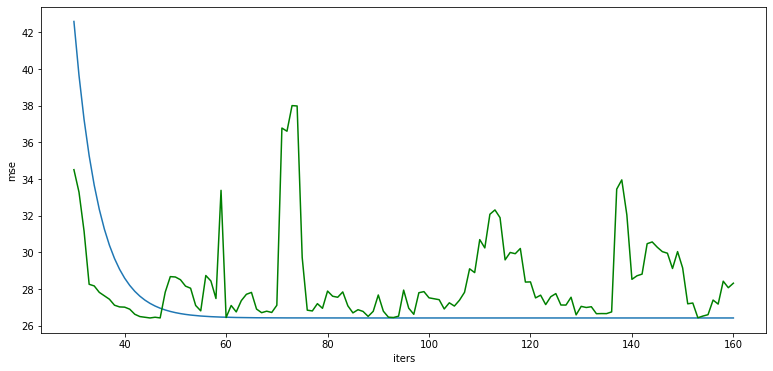

In [330]:
plt.figure(figsize=(13, 6))
plt.xlabel(r'iters')
plt.ylabel(r'mse')

x = range(iters_gd)
delta = 30
plt.plot(x[delta:], errors_gd[delta:])
plt.plot(x[delta:], errors_sgd[delta:iters_gd], c='g')

plt.show()

In [322]:
iters_gd, iters_sgd

(161, 1000)

По значениям видно, что стохастическому градиентному спуску потребовалось намного больше операций для попытки достижения сходимости. Также, это видно из графика. Синие точки, в отличие от зеленых, практически сразу стремятся к некоторому значению ошибки.